# Customer Segmentation Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


In [4]:
df.shape

(2205, 39)

There are total 2205 rows and 39 features in the dataset.

In [5]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [6]:
df.isnull().any()

Income                  False
Kidhome                 False
Teenhome                False
Recency                 False
MntWines                False
MntFruits               False
MntMeatProducts         False
MntFishProducts         False
MntSweetProducts        False
MntGoldProds            False
NumDealsPurchases       False
NumWebPurchases         False
NumCatalogPurchases     False
NumStorePurchases       False
NumWebVisitsMonth       False
AcceptedCmp3            False
AcceptedCmp4            False
AcceptedCmp5            False
AcceptedCmp1            False
AcceptedCmp2            False
Complain                False
Z_CostContact           False
Z_Revenue               False
Response                False
Age                     False
Customer_Days           False
marital_Divorced        False
marital_Married         False
marital_Single          False
marital_Together        False
marital_Widow           False
education_2n Cycle      False
education_Basic         False
education_

Dataset doen not contain any null value.

In [7]:
df.select_dtypes(include='int')

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


Only the customer 'income' feature has a float data type and all others are numeric. 
This is a good thing because if the dataset contain object features then we was need to convert the data type of feature into numeric or even the whole values into categorical.

In [8]:
df.select_dtypes(include='float')

,Income
0,58138.0
1,46344.0
2,71613.0
3,26646.0
4,58293.0
...,...
2200,61223.0
2201,64014.0
2202,56981.0
2203,69245.0


In [9]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


The 'Recency' column contains the number of days since the last purchase made by the customer. 
'Wines' means alcoholic drinks.

In [10]:
df['Recency'].mean()

np.float64(49.00907029478458)

In [11]:
df['Recency'].max()

np.int64(99)

In [12]:
df['Recency'].min()

np.int64(0)

In [13]:
df['Income'].mean()

np.float64(51622.0947845805)

In [14]:
df['Income'].max()

np.float64(113734.0)

In [15]:
df['Income'].min()

np.float64(1730.0)

In [16]:
# Average of kids in customer home.

a=df['Kidhome'].mean()
print(a)
b = round(df['Kidhome'].mean())
print(b)

0.4421768707482993
0


In [17]:
# Average of Teenagers in customer home.

c=df['Teenhome'].mean()
print(a)
d=round(df['Teenhome'].mean())
print(b)

0.4421768707482993
0


Let's start clustering with K-Means algorithm. 

In [18]:
features = [
    "Income", "Age", "Recency", "MntWines", "MntFruits", "MntMeatProducts", 
    "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", 
    "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", 
    "MntTotal", "MntRegularProds"
]

I retrieve only the important features from the dataset on which if I trained model then the output will be best.

In [19]:
df_selected = df[features]

In [20]:
scalar = StandardScaler()

StandardScaler() is a preprocessing technique that standardizes features by removing the mean and scaling to unit variance. This means it transforms the data so that each feature has a mean of 0 and a standard deviation of 1

In [21]:
df_scaled = scalar.fit_transform(df_selected)
df_scaled

array([[ 0.31465086,  1.01718872,  0.31083003, ...,  0.68920297,
         1.67805628,  1.66562482],
       [-0.25487741,  1.27353005, -0.38060021, ..., -0.13964489,
        -0.94087999, -0.90967635],
       [ 0.96535404,  0.33361186, -0.79545835, ..., -0.55406882,
         0.29738364,  0.31295962],
       ...,
       [ 0.25877972, -1.03354187,  1.45168993, ...,  0.27477904,
         1.1362074 ,  1.21774636],
       [ 0.85100412,  1.10263583, -1.41774556, ..., -0.96849275,
         0.38074501,  0.36533251],
       [ 0.06021263,  1.27353005, -0.31145718, ...,  0.68920297,
        -0.71510962, -0.70199077]])

In [22]:
df_scaled = pd.DataFrame(df_scaled, columns=features)
df_scaled.head()

,Income,Age,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntTotal,MntRegularProds
0,0.314651,1.017189,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,1.678056,1.665625
1,-0.254877,1.273530,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-0.940880,-0.909676
2,0.965354,0.333612,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,0.297384,0.312960
3,-1.206087,-1.289883,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-0.893989,-0.859109
4,0.322136,-1.033542,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.270516,-0.228829


In [23]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # 'random_state=42' This controls the random number generation.
    # 'n_init' This specifies how often the K-means algorithm will run with different random centroid initializations.
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_) # It provides a measure of within-cluster dispersion

Text(0.5, 1.0, 'Elbow Method')

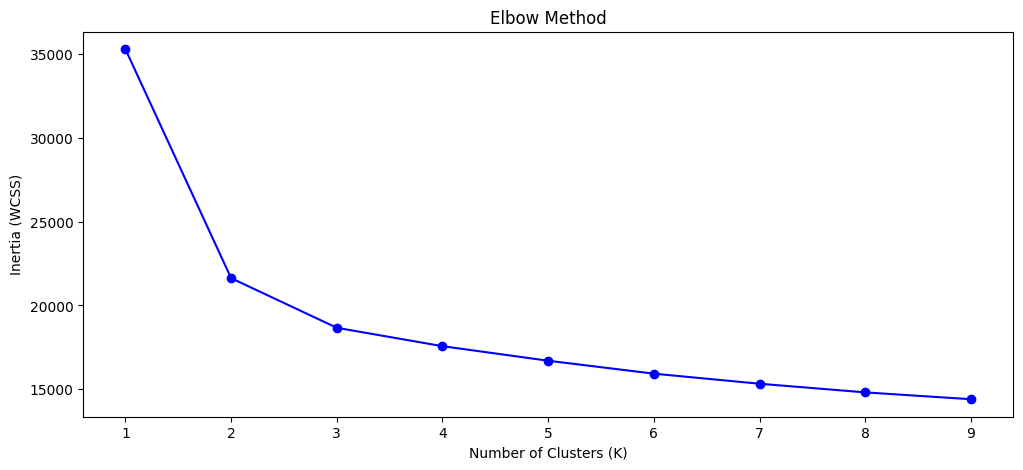

In [24]:
plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")

According to Elbow Method we have two clusters values 3 or 4 that are best and I try both then 3 clusters are showing better output then 4 because I choose it.

In [25]:
# Apply K-Means with K=3

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42 , n_init=10) 
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Add cluster labels to original dataset
df["Cluster"] = df_scaled["Cluster"]

# Check cluster distribution
print(df["Cluster"].value_counts())


Cluster
1    1042
2     609
0     554
Name: count, dtype: int64


In [26]:
# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2) #PCA stands for Principal Component Analysis
df_pca = pca.fit_transform(df_scaled.drop(columns=["Cluster"]))  # Drop cluster column

# Fit K-Means again for visualization
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled.drop(columns=["Cluster"]))

# Get cluster centroids
centroids = pca.transform(kmeans.cluster_centers_)

C:\Users\star\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


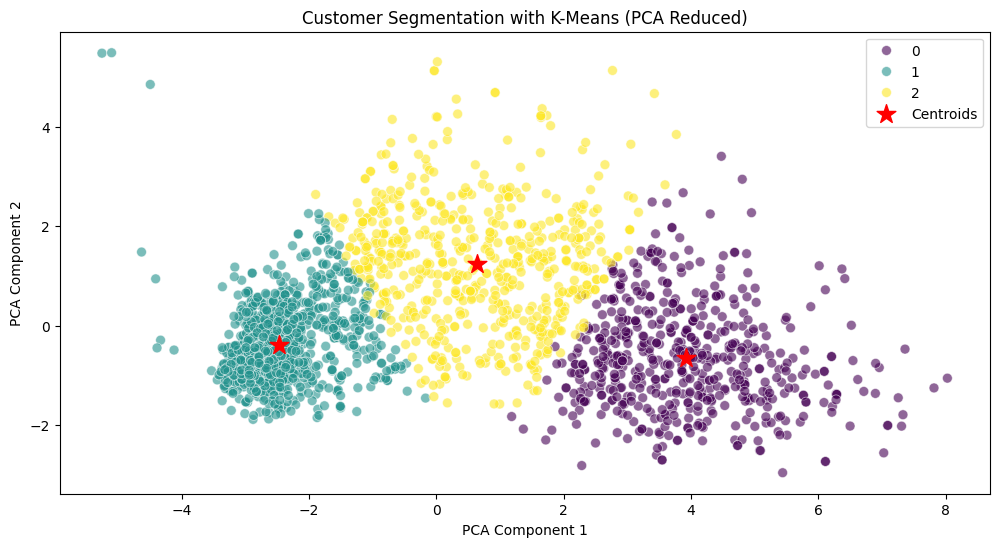

In [27]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette="viridis", s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", s=200, color="red", label="Centroids")  # Centroids
plt.title("Customer Segmentation with K-Means (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [28]:
print(df["Cluster"].value_counts())

Cluster
1    1042
2     609
0     554
Name: count, dtype: int64


In [29]:

df_scaled["Cluster"] = kmeans.fit_predict(df_scaled.drop(columns=["Cluster"], errors="ignore"))  # Drop if exists

# Compute distance of each data point to its assigned centroid
distances = np.min(kmeans.transform(df_scaled.drop(columns=["Cluster"])), axis=1)

# Add distances to the dataframe
df["Distance_to_Centroid"] = distances

# Display the first few rows
df[["Cluster", "Distance_to_Centroid"]].head()


,Cluster,Distance_to_Centroid
0,0,3.546273
1,1,1.860317
2,2,2.654129
3,1,1.473175
4,2,2.756304


C:\Users\star\AppData\Local\Temp\ipykernel_23140\3709310140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Cluster"], y=df["Distance_to_Centroid"], palette="viridis")


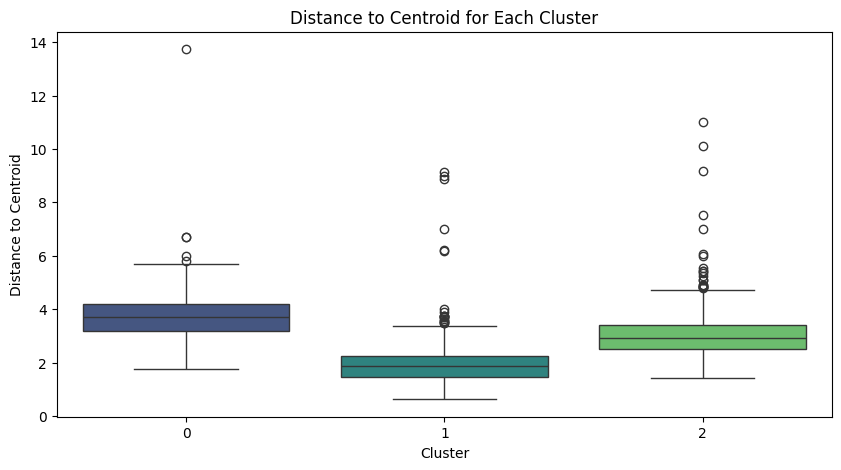

In [30]:


plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Cluster"], y=df["Distance_to_Centroid"], palette="viridis")
plt.title("Distance to Centroid for Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Distance to Centroid")
plt.show()


In [31]:
# Apply K-Means with Convergence Control
kmeans = KMeans(n_clusters=3, random_state=42, tol=1e-4, max_iter=500, n_init=10)

# Fit model
kmeans.fit(df_scaled)

# Check the number of iterations before convergence
print(f"Model converged in {kmeans.n_iter_} iterations")


Model converged in 4 iterations


In [32]:
print(df["Cluster"].value_counts())

Cluster
1    1042
2     609
0     554
Name: count, dtype: int64


In [33]:
# Get cluster-wise averages of features
cluster_summary = df.groupby("Cluster").mean()

# Display results
print(cluster_summary)


               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        76297.909747  0.043321  0.222022  50.211191  644.745487  70.380866   
1        34625.403071  0.764875  0.468330  49.126679   44.412668   4.877159   
2        58256.169130  0.252874  0.830870  47.714286  446.019704  23.228243   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             464.406137       102.129964         72.027076     78.705776   
1              23.048944         7.142035          5.001919     15.517274   
2             136.642036        31.577997         24.142857     61.369458   

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                            
0                 1.355596         5.274368             6.046931   
1             

C:\Users\star\AppData\Local\Temp\ipykernel_23140\2504843048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="MntTotal", data=df, palette="viridis")


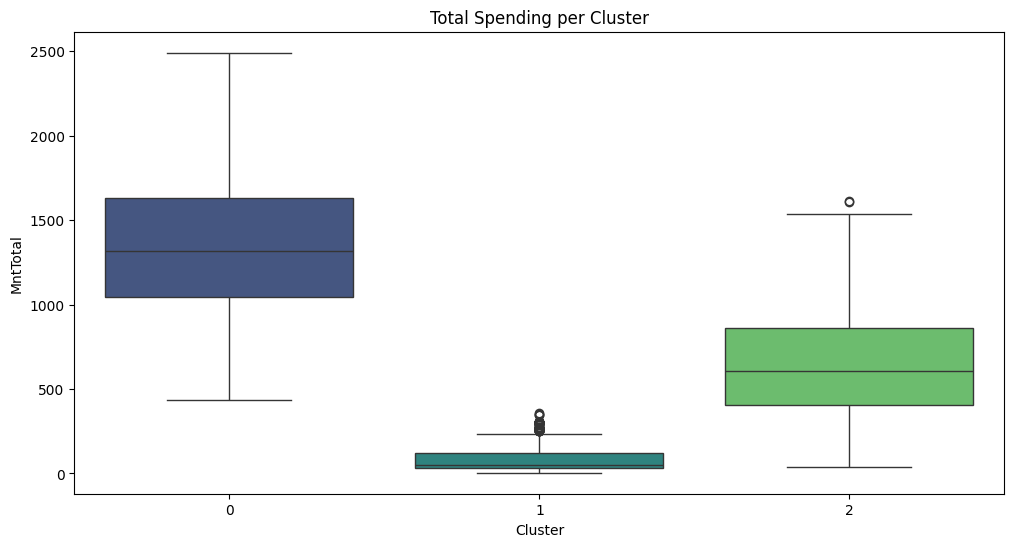

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cluster", y="MntTotal", data=df, palette="viridis")
plt.title("Total Spending per Cluster")
plt.show()


The Total Spending of the customers form the first cluster is very high than other clusters customers. 

In [35]:
# The previous cluster_summary conatins many features because it is very hard to interpret. 
# Now I summarize key features by cluster.
cluster_summary = df.groupby("Cluster").agg({
    "Income": "mean",
    "MntTotal": "mean",
    "NumWebPurchases": "mean",
    "NumCatalogPurchases": "mean",
    "NumStorePurchases": "mean",
    "NumWebVisitsMonth": "mean",
    "Recency": "mean"
}).reset_index()

# Display the summary
print(cluster_summary)


   Cluster        Income     MntTotal  NumWebPurchases  NumCatalogPurchases  \
0        0  76297.909747  1353.689531         5.274368             6.046931   
1        1  34625.403071    84.482726         2.148752             0.565259   
2        2  58256.169130   661.610837         6.372742             3.110016   

   NumStorePurchases  NumWebVisitsMonth    Recency  
0           8.444043           2.931408  50.211191  
1           3.249520           6.466411  49.126679  
2           7.844007           5.592775  47.714286  


We can call the first Cluster 'VIP Customers',
second cluster as 'Inactive Customers',
third cluster as 'Active Customers'.

##### Recommendations

For inactive customers (Cluster 1), use email reminders, targeted discounts, etc.
Active (Cluster 2) and Inactive customers have high monthly website visits, so improve the website's UX, offer faster checkout, or offer free shipping.
VIP Customers (Cluster 0), send premium offers, and early access to new products.
Because the Income of Inactive customers is lower than others, share discount offers with them.
Also, increase the number of stores and steps to enhance their look because most products are sold from there.